# Mean vs. SD visualization

Here, we look into examining whether mean and variance of the given LC dataset have a positive correlation. 

### TLDR

* We want [2]
* Within groups, mean and standard deviation are positively correlated. This is similar to microarray data [2, see relevant quote in **References** section]. 
    * **Control**: Pearson's r = 0.629, p-val = 6.52e-20
    * **Treatment**: Pearson's r = 0.720, p-val = 3.49e-28
* Within groups, mean(log2-abundance) and SD(log2-abundance) are negatively correlated. This is the exactly opposite to microarray data.
    * **Control**: Pearson's r = -0.509, p-val = 1.94e-12)

### Addendum

* The Pearson's p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. Not entirely reliable, but reasonable for datasets of size > 500.


### References

* [1] *There is no silver bullet – a guide to low-level data transforms and normalisation methods for microarray data* David P. Kreilm, Brief Bioinform. 2005
* [2] *Variance stabilization applied to microarray data calibration and to the quantification of differential expression*. Wolfgang Huber et. al. Bioinformatics (2002). 

> *The analysis of replicate microarray data typically shows that the variance of the measured spot intensities increases with their mean.*

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import helper_funcs

from scipy.stats import pearsonr as pearsonr


In [3]:
d0 = pd.read_csv("/Users/don/Documents/my_vignettes/data/test_dme_data.csv").fillna(0)

(d_log, dlm, dz, dz2, dz3) = helper_funcs.load_datasets(d0)

/Users/don/Documents/my_vignettes/vsn/helper_funcs.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  d_log[new_colname] = np.log2(d_t[cnm])


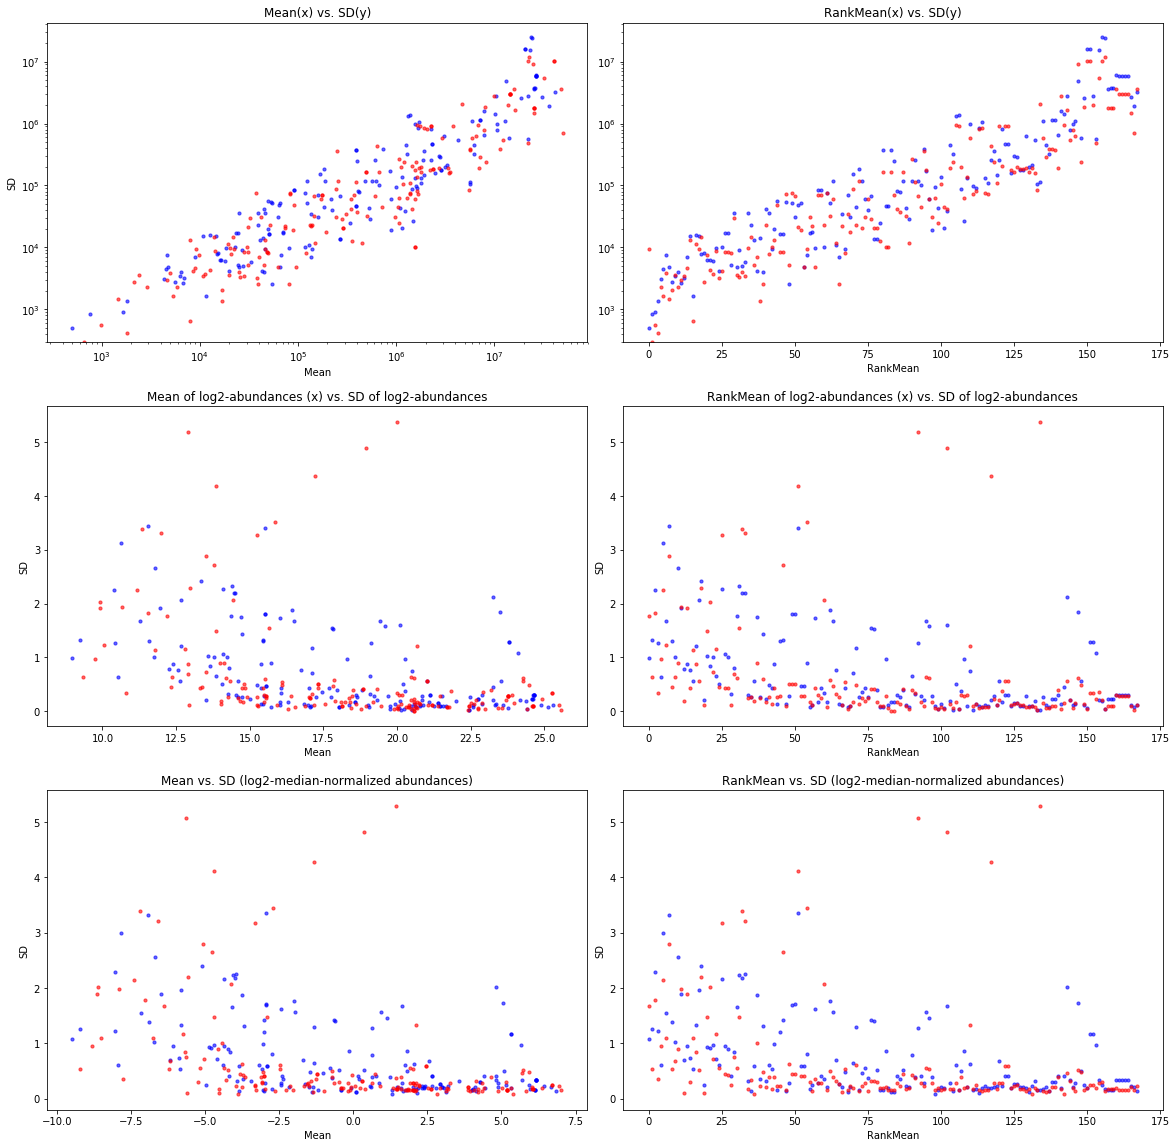

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
marker_size = 10

# Row 1
axs[0,0].scatter(np.array(dz["ctrl_mean"]), np.array(dz["ctrl_sd"]), alpha=0.6, c="blue", s=marker_size)
axs[0,0].scatter(np.array(dz["trtmt_mean"]), np.array(dz["trtmt_sd"]), alpha=0.6, c="red", s=marker_size)
axs[0,0].set_xscale("log")
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel("Mean")
axs[0,0].set_ylabel("SD")
axs[0,0].set_title("Mean(x) vs. SD(y)")

axs[0,1].scatter(x=np.arange(len(dz["ctrl_mean"])), y=dz["ctrl_sd"], alpha=0.6, c="blue", s=marker_size)
axs[0,1].scatter(x=np.arange(len(dz["trtmt_mean"])), y=dz["trtmt_sd"], alpha=0.6, c="red", s=marker_size)
axs[0,1].set_title("RankMean(x) vs. SD(y)")
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel("RankMean")

# Row 2
axs[1,0].scatter(np.array(dz2["ctrl_mean"]), np.array(dz2["ctrl_sd"]), alpha=0.6, c="blue", s=marker_size)
axs[1,0].scatter(np.array(dz2["trtmt_mean"]), np.array(dz2["trtmt_sd"]), alpha=0.6, c="red", s=marker_size)
axs[1,0].set_xlabel("Mean")
axs[1,0].set_ylabel("SD")
axs[1,0].set_title("Mean of log2-abundances (x) vs. SD of log2-abundances")

axs[1,1].scatter(np.arange(len(dz2["ctrl_mean"])), np.array(dz2["ctrl_sd"]), alpha=0.6, c="blue", s=marker_size)
axs[1,1].scatter(np.arange(len(dz2["trtmt_mean"])), np.array(dz2["trtmt_sd"]), alpha=0.6, c="red", s=marker_size)
axs[1,1].set_xlabel("RankMean")
axs[1,1].set_ylabel("SD")
axs[1,1].set_title("RankMean of log2-abundances (x) vs. SD of log2-abundances")

# Row 3
axs[2,0].scatter(np.array(dz3["ctrl_mean"]), np.array(dz3["ctrl_sd"]), alpha=0.6, c="blue", s=marker_size)
axs[2,0].scatter(np.array(dz3["trtmt_mean"]), np.array(dz3["trtmt_sd"]), alpha=0.6, c="red", s=marker_size)
axs[2,0].set_xlabel("Mean")
axs[2,0].set_ylabel("SD")
axs[2,0].set_title("Mean vs. SD (log2-median-normalized abundances)")

axs[2,1].scatter(np.arange(len(dz3["ctrl_mean"])), np.array(dz3["ctrl_sd"]), alpha=0.6, c="blue", s=marker_size)
axs[2,1].scatter(np.arange(len(dz3["trtmt_mean"])), np.array(dz3["trtmt_sd"]), alpha=0.6, c="red", s=marker_size)
axs[2,1].set_xlabel("RankMean")
axs[2,1].set_ylabel("SD")
axs[2,1].set_title("RankMean vs. SD (log2-median-normalized abundances)")

plt.subplots_adjust(wspace=0.065, hspace=0.2)
plt.show()